<a href="https://colab.research.google.com/github/blbaholo/Image-classification-CNN-model/blob/main/Assigment_5_Chess_pieces_and_CNN_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook a simple convolutional neural network is built for image classification of the following chess pieces: rook, bishop, knight, queen and pawn. The model's performance is evaulated on both training and validation data by reporting its accuracy and loss.



# Loading and Preprocessing Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.activations import softmax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os

In [ ]:
# Upload dataset as zip file and then unzip
!unzip /content/chess-pieces-detection-images-dataset.zip

Archive:  /content/chess-pieces-detection-images-dataset.zip
   creating: chess-pieces-detection-images-dataset/
  inflating: __MACOSX/._chess-pieces-detection-images-dataset  
   creating: chess-pieces-detection-images-dataset/pawn_resized/
  inflating: __MACOSX/chess-pieces-detection-images-dataset/._pawn_resized  
   creating: chess-pieces-detection-images-dataset/Rook-resize/
  inflating: __MACOSX/chess-pieces-detection-images-dataset/._Rook-resize  
   creating: chess-pieces-detection-images-dataset/bishop_resized/
  inflating: __MACOSX/chess-pieces-detection-images-dataset/._bishop_resized  
   creating: chess-pieces-detection-images-dataset/Queen-Resized/
  inflating: __MACOSX/chess-pieces-detection-images-dataset/._Queen-Resized  
   creating: chess-pieces-detection-images-dataset/knight-resize/
  inflating: __MACOSX/chess-pieces-detection-images-dataset/._knight-resize  
  inflating: chess-pieces-detection-images-dataset/pawn_resized/00000138_resized.jpg  
  inflating: __MACOS

In [ ]:
# Rename image folders to create consistancy
direct = "./chess-pieces-detection-images-dataset"
folders = os.listdir(direct)
for folder in folders:
  new_name = folder.lower().replace("-", "_").split("_")[0]
  os.rename(os.path.join(direct, folder), os.path.join(direct, new_name))

In [ ]:
# Create image data generator instances for training and validation sets
train_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)
input_shape = (150,150)
batch_size = 64
class_mode = "categorical"
colour_mode ="rgb"
train_generator = train_data_generator.flow_from_directory("/content/chess-pieces-detection-images-dataset",
    target_size= input_shape,
    color_mode=colour_mode,
    batch_size=batch_size,
    class_mode=class_mode,
    subset="training",
    shuffle=True,
    seed=42)
validation_generator = train_data_generator.flow_from_directory(
    "/content/chess-pieces-detection-images-dataset",
    target_size=input_shape,
    color_mode=colour_mode,
    batch_size=batch_size,
    class_mode=class_mode,
    subset="validation",
    shuffle=True,
    seed=42)

Found 458 images belonging to 5 classes.
Found 193 images belonging to 5 classes.


# Building the model

In [ ]:
# Create sequential model
model = models.Sequential([

    # Input layer
    layers.Input(shape=(150, 150, 3)),

    # First 2D convolution layer followed by maximum pooling
    layers.Conv2D(16, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    # Second 2D Conv layer followed by maximum pooling
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    # Flattening the output from last convolution layer
    layers.Flatten(),

    # Densely connected layer
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),

     # Densely connected layer
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),

    # Output layer with 10 classes
    layers.Dense(5, activation="softmax")
])


In [ ]:
# Generate model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,308,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,322,693 (20.30 MB)

 Trainable params: 5,322,693 (20.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the model
model.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy, metrics=['accuracy'])

# Training the model
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.1839 - loss: 1.7172 - val_accuracy: 0.2280 - val_loss: 1.6028
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.2366 - loss: 1.5765 - val_accuracy: 0.2746 - val_loss: 1.5559
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.2895 - loss: 1.5513 - val_accuracy: 0.3420 - val_loss: 1.5104
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3911 - loss: 1.4374 - val_accuracy: 0.4041 - val_loss: 1.4422
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4181 - loss: 1.3810 - val_accuracy: 0.4301 - val_loss: 1.3796
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4503 - loss: 1.2742 - val_accuracy: 0.4456 - val_loss: 1.3288
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5561 - loss: 1.1303 - val_accuracy: 0.4145 - val_loss: 1.3401
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5830 - loss: 1.0599 - val_accuracy: 0.4404 - val_loss: 1.2997
Epoch 9/30
8/8 ━━━━

# Model performance

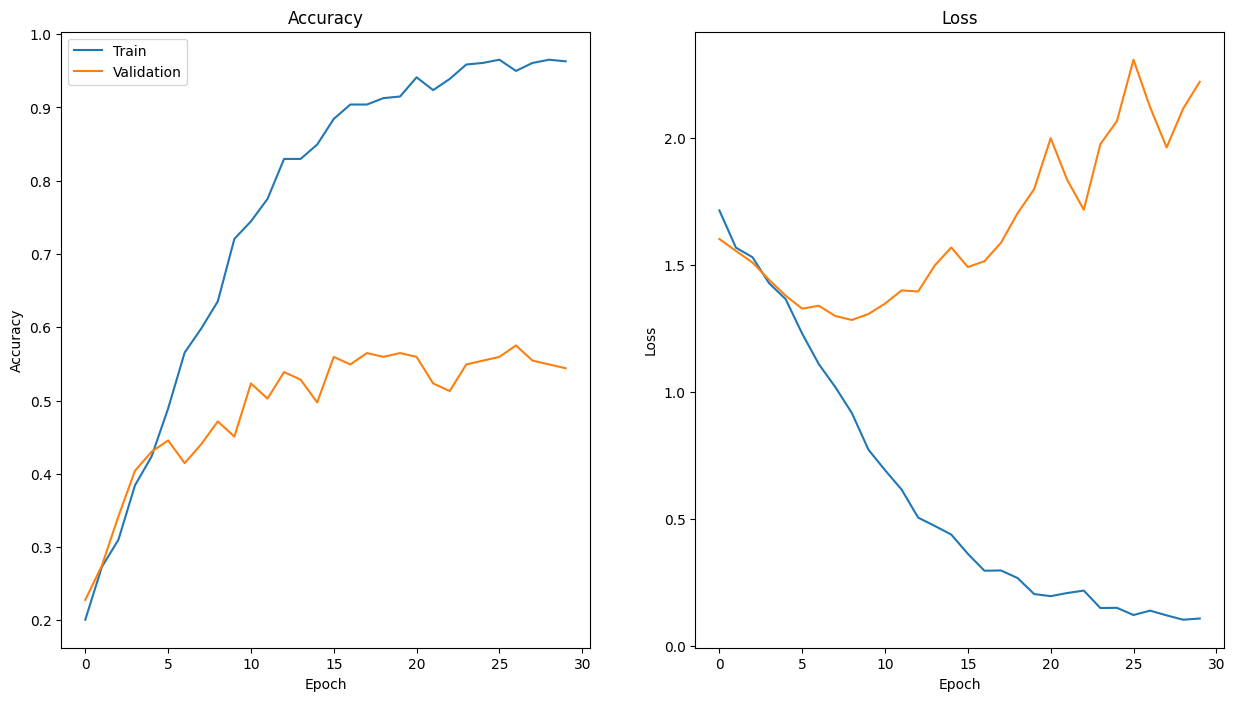

In [ ]:
# Plotting accuracy and loss over epochs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Plot training & validation accuracy
axes[0].plot(history.history["accuracy"], label="accuracy")
axes[0].plot(history.history["val_accuracy"], label = "val_accuracy")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend((["Train", "Validation"]))
axes[0].set_title("Accuracy")

# Plot training & validation loss
axes[1].plot(history.history["loss"], label="loss")
axes[1].plot(history.history["val_loss"], label = "val_loss")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[0].legend((["Train", "Validation"]))
axes[1].set_title("Loss")

plt.show()

# Making predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/step


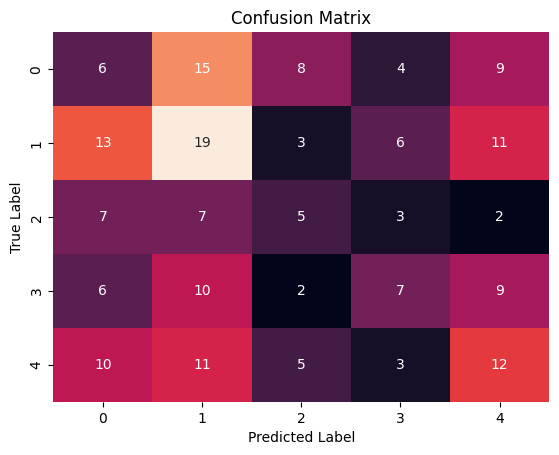


Classification Report
              precision    recall  f1-score   support

      Bishop       0.14      0.14      0.14        42
        Rook       0.31      0.37      0.33        52
        Pawn       0.22      0.21      0.21        24
       Queen       0.30      0.21      0.25        34
      Knight       0.28      0.29      0.29        41

    accuracy                           0.25       193
   macro avg       0.25      0.24      0.24       193
weighted avg       0.25      0.25      0.25       193



In [ ]:
num_of_test_samples = 192
# Confution Matrix and Classification Report
predictions = model.predict(validation_generator, num_of_test_samples // batch_size + 1)
pred = np.argmax(predictions, axis=1)
matrix1 = confusion_matrix(validation_generator.classes, pred)

sns.heatmap(matrix1, annot=True, cbar=False);
plt.ylabel('True Label');
plt.xlabel('Predicted Label');
plt.title('Confusion Matrix');
plt.show()

print('\nClassification Report')
target_names = ['Bishop',
                'Rook',
                'Pawn',
                'Queen',
                'Knight']
class_report = classification_report(validation_generator.classes, pred, target_names=target_names)
print(class_report)


# Conclusion

* The accuracy is 25% for the validation set.

* The model is prone to overfitting therefore the batch_size was increased from 32 to 64, epoch from 10 to 30 and one more fully connected layer was added followed by regularization using dropouts to increase the accuracy of the model. While increasing the number of epochs has increased the accuracy on the training data, the accuracy on the validation set remains the same thus overfitting is till an issue.

* From the accuracy and loss plots, there is a steady increase in the accuracy and decrease in loss for the training set while the validation set's accuracy increases unti the 50 - 55% mark and the loss increases after 15 epochs.
